In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statistics as st
from datetime import datetime
from matplotlib.pylab import rcParams
import warnings;
warnings.simplefilter("ignore")

In [2]:
rcParams["figure.figsize"] = 8, 6

def parser(x):
    return datetime.strptime(x, "%Y")

data = pd.read_excel("statistic_id75188_umsatz-mit-werbung-von-google-bis-2020.xlsx", index_col=0, sheet_name = "Daten", parse_dates=[0], 
                     date_parser=parser )




In [3]:
#Werbeumsätze von Google in den Jahren 2001 bis 2020 (in Milliarden US-Dollar)
data

,Umsatz
Jahr,
2001-01-01,0.07
2002-01-01,0.41
2003-01-01,1.42
2004-01-01,3.14
2005-01-01,6.07
2006-01-01,10.49
2007-01-01,16.41
2008-01-01,21.13
2009-01-01,22.89


In [6]:
#save for the paper
data.to_html("table")

# Data Exploration

In [7]:
#describe the data
data.describe()

,Umsatz
count,20.000000
mean,47.086000
std,46.203528
min,0.070000
25%,9.385000
50%,32.385000
75%,70.387500
max,146.920000


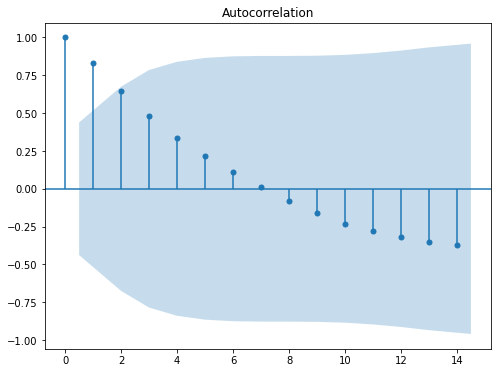

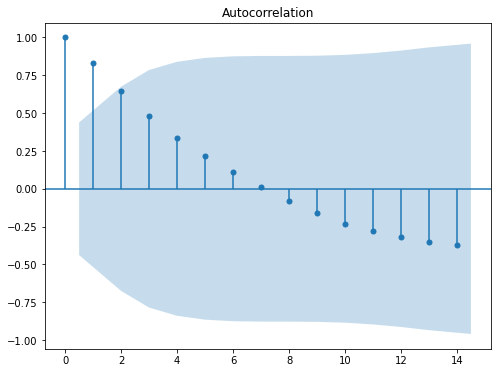

In [8]:
#visual stationarity check
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

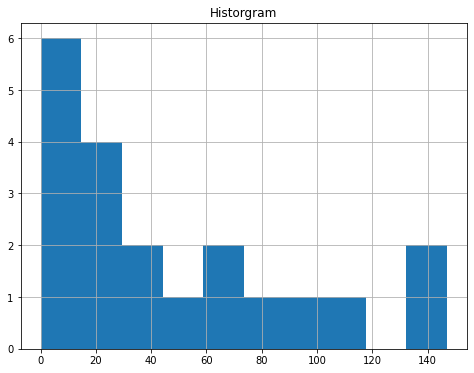

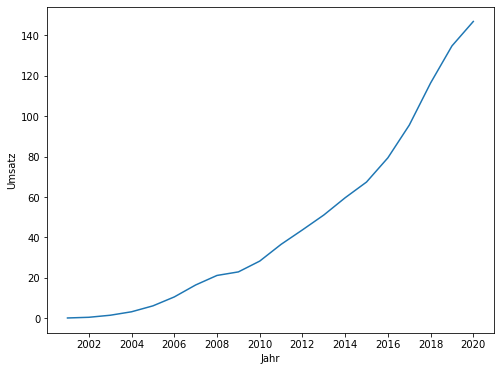

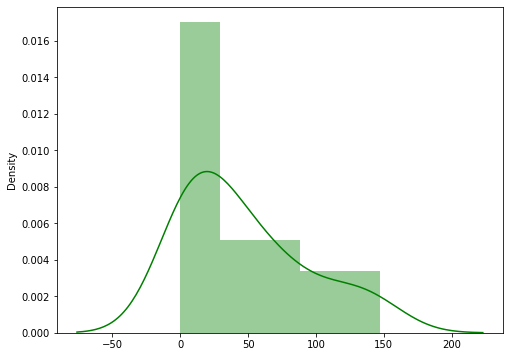

In [9]:
#histogram
data.hist()
plt.title("Historgram")
plt.savefig("Hist")
plt.show()

#plot
plt.ylabel("Umsatz")
plt.xlabel("Jahr")
plt.plot(data)
plt.savefig("Trend")




#distribution
fig, ax = plt.subplots()
sns.distplot(data, bins=5, color="g", ax=ax)
plt.savefig("Dist")
plt.show()

In [10]:
#determing rolling statistics
rolmean = data.rolling(window=12).mean()

rolstd = data.rolling(window=12).std()
print(rolmean, rolstd)

               Umsatz
Jahr                 
2001-01-01        NaN
2002-01-01        NaN
2003-01-01        NaN
2004-01-01        NaN
2005-01-01        NaN
2006-01-01        NaN
2007-01-01        NaN
2008-01-01        NaN
2009-01-01        NaN
2010-01-01        NaN
2011-01-01        NaN
2012-01-01  15.874167
2013-01-01  20.124167
2014-01-01  25.058333
2015-01-01  30.555833
2016-01-01  36.909167
2017-01-01  44.368333
2018-01-01  53.199167
2019-01-01  63.065833
2020-01-01  73.548333                Umsatz
Jahr                 
2001-01-01        NaN
2002-01-01        NaN
2003-01-01        NaN
2004-01-01        NaN
2005-01-01        NaN
2006-01-01        NaN
2007-01-01        NaN
2008-01-01        NaN
2009-01-01        NaN
2010-01-01        NaN
2011-01-01        NaN
2012-01-01  14.818710
2013-01-01  17.023408
2014-01-01  19.228013
2015-01-01  21.186210
2016-01-01  23.520211
2017-01-01  26.813745
2018-01-01  31.654972
2019-01-01  37.125195
2020-01-01  41.686487


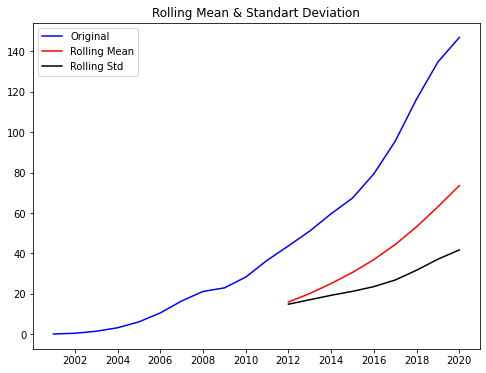

In [11]:
#Plot rolling statistics:
orig = plt.plot(data, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling Mean")
std = plt.plot(rolstd, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standart Deviation")
plt.show(block=False)

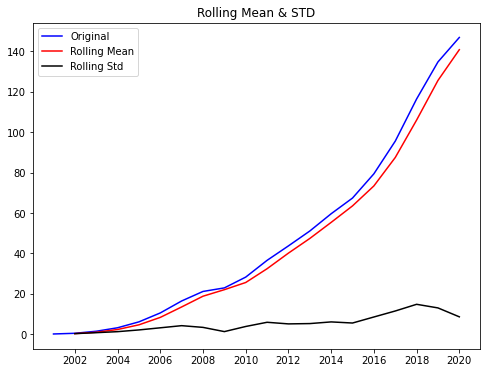

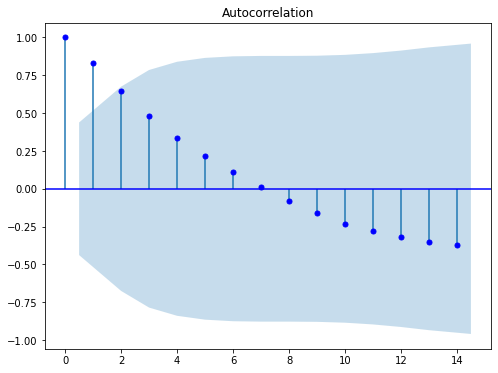

Results of Dickey-Fuller Test:
Test Statistics                 3.459295
p-value                         1.000000
#Lags Used                      4.000000
Numbers of Observation Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [12]:
#Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD = timeseries.rolling(window=2).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color="blue", label = "Original")
    mean = plt.plot(movingAverage, color="red", label = "Rolling Mean")
    std = plt.plot(movingSTD, color="black", label = "Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & STD")
    plt.show(block=False)
    
    #Stationarity statistics:
    plot_acf(timeseries, color="blue")
    plt.show(block=False)
    
    
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries["Umsatz"], autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistics", "p-value", "#Lags Used", "Numbers of Observation Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)" %key] = value
    print(dfoutput)
    
    

test_stationarity(data)

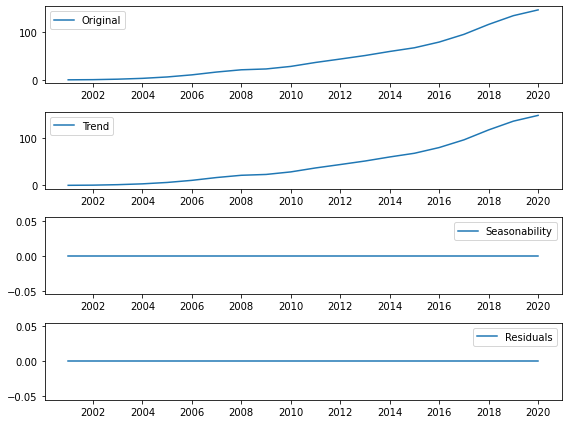

In [13]:
#check for trend, seasonality, residuals
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="Seasonability")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")
plt.tight_layout()



### Convert the data


<AxesSubplot:xlabel='Jahr'>

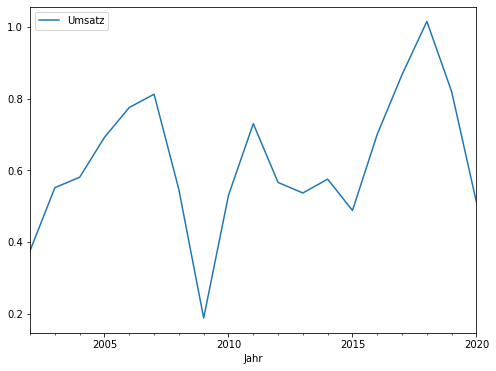

In [14]:
# Since the data has a trend - Difference and Square Root
data_diff = np.sqrt(data).diff()
data_diff = data_diff.dropna()
data_diff.plot()

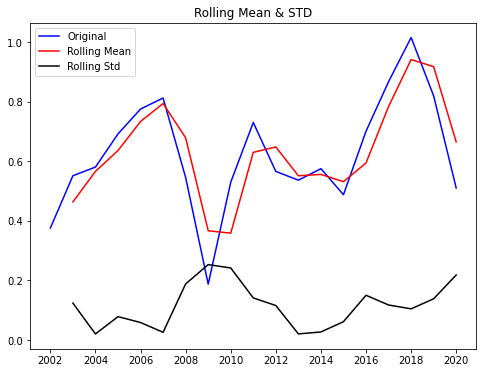

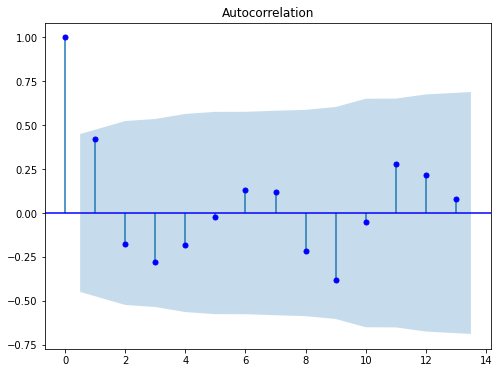

Results of Dickey-Fuller Test:
Test Statistics                -3.542027
p-value                         0.006971
#Lags Used                      1.000000
Numbers of Observation Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


In [15]:
test_stationarity(data_diff)

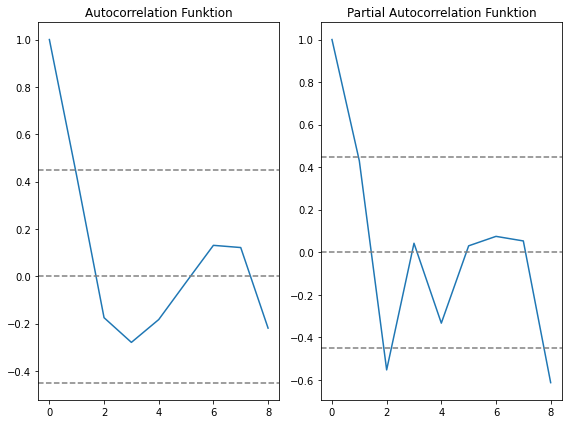

In [16]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data_diff, nlags=8)
lag_pacf = pacf(data_diff, nlags=8, method="ols")

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = "--", color="gray")
plt.axhline(y = -1.96/np.sqrt(len(data_diff)), linestyle="--", color="gray")
plt.axhline(y = 1.96/np.sqrt(len(data_diff)), linestyle="--", color="gray")
plt.title("Autocorrelation Funktion")

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y= 0, linestyle = "--", color="gray")
plt.axhline(y = -1.96/np.sqrt(len(data_diff)), linestyle="--", color="gray")
plt.axhline(y = 1.96/np.sqrt(len(data_diff)), linestyle="--", color="gray")
plt.title("Partial Autocorrelation Funktion")
plt.tight_layout()

# Building Models

C:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


Plotting AR model


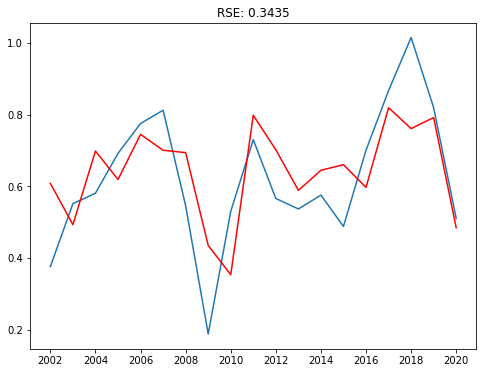

In [17]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(data_diff, order=(2, 0, 2))
results_AR = model.fit(disp= -1)
plt.plot(data_diff)
plt.plot(results_AR.fittedvalues, color="red")
plt.title("RSE: %.4f" % sum((results_AR.fittedvalues-data_diff["Umsatz"])**2))
print("Plotting AR model")

C:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


Plotting MA model


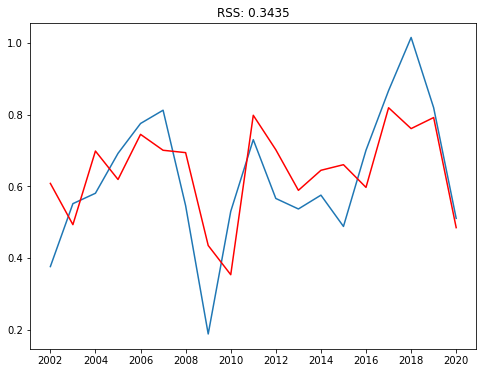

In [18]:
#MA Model
model = ARIMA(data_diff, order=(2, 0, 2))
results_MA = model.fit(disp=-1)
plt.plot(data_diff)
plt.plot(results_MA.fittedvalues, color="red")
plt.title("RSS: %.4f" % sum((results_MA.fittedvalues-data_diff["Umsatz"])**2))
print("Plotting MA model") 

C:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


Plotting ARIMA model


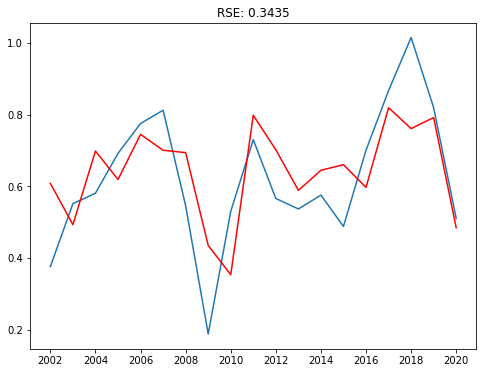

In [19]:
#ARIMA
model = ARIMA(data_diff, order=(2, 0, 2))
results_ARIMA = model.fit(disp= -1)
plt.plot(data_diff)
plt.plot(results_ARIMA.fittedvalues, color="red")
plt.title("RSE: %.4f" % sum((results_AR.fittedvalues-data_diff["Umsatz"])**2))
print("Plotting ARIMA model")

In [20]:
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)

predictions_ARIMA



Jahr
2002-01-01    0.607861
2003-01-01    0.492736
2004-01-01    0.698160
2005-01-01    0.618804
2006-01-01    0.744727
2007-01-01    0.700330
2008-01-01    0.693738
2009-01-01    0.434530
2010-01-01    0.353026
2011-01-01    0.797987
2012-01-01    0.701810
2013-01-01    0.588517
2014-01-01    0.644427
2015-01-01    0.660089
2016-01-01    0.596697
2017-01-01    0.819044
2018-01-01    0.760819
2019-01-01    0.791683
2020-01-01    0.484356
dtype: float64

Jahr
2002-01-01      0.369494
2003-01-01      1.211313
2004-01-01      3.235527
2005-01-01      5.844603
2006-01-01     10.000068
2007-01-01     14.919821
2008-01-01     20.760380
2009-01-01     24.908947
2010-01-01     28.557395
2011-01-01     37.722918
2012-01-01     46.836342
2013-01-01     55.237969
2014-01-01     65.232313
2015-01-01     76.330650
2016-01-01     87.113063
2017-01-01    103.072894
2018-01-01    119.100142
2019-01-01    137.006654
2020-01-01    148.580017
dtype: float64


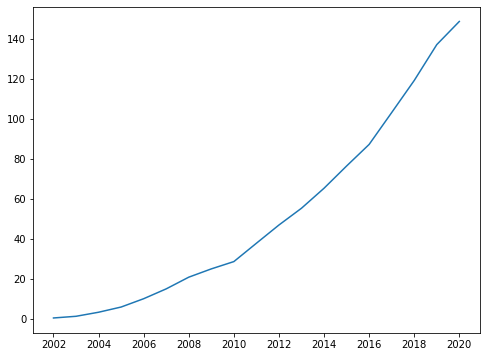

In [21]:
#Converted to cumulative sum
predictions_ARIMA_cumsum = np.square(predictions_ARIMA.cumsum())
print(predictions_ARIMA_cumsum)
plt.plot(predictions_ARIMA_cumsum)


Jahr
2001-01-01      0.375737
2002-01-01      0.745232
2003-01-01      1.587051
2004-01-01      3.611265
2005-01-01      6.220340
2006-01-01     10.375805
2007-01-01     15.295558
2008-01-01     21.136117
2009-01-01     25.284684
2010-01-01     28.933133
2011-01-01     38.098656
2012-01-01     47.212079
2013-01-01     55.613706
2014-01-01     65.608050
2015-01-01     76.706387
2016-01-01     87.488800
2017-01-01    103.448631
2018-01-01    119.475879
2019-01-01    137.382392
2020-01-01    148.955754
dtype: float64

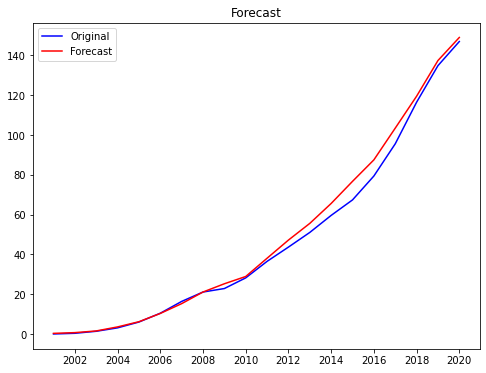

In [34]:
predictions_ARIMA = pd.Series(data_diff["Umsatz"].iloc[0],index=data.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_cumsum,fill_value=0)


orig = plt.plot(data, color="blue", label = "Original")
forecast = plt.plot(predictions_ARIMA, color="red", label = "Forecast")
plt.legend(loc="best")
plt.title("Forecast")
predictions_ARIMA

In [23]:
predictions_ARIMA

Jahr
2001-01-01      0.375737
2002-01-01      0.745232
2003-01-01      1.587051
2004-01-01      3.611265
2005-01-01      6.220340
2006-01-01     10.375805
2007-01-01     15.295558
2008-01-01     21.136117
2009-01-01     25.284684
2010-01-01     28.933133
2011-01-01     38.098656
2012-01-01     47.212079
2013-01-01     55.613706
2014-01-01     65.608050
2015-01-01     76.706387
2016-01-01     87.488800
2017-01-01    103.448631
2018-01-01    119.475879
2019-01-01    137.382392
2020-01-01    148.955754
dtype: float64

### Forecast Away


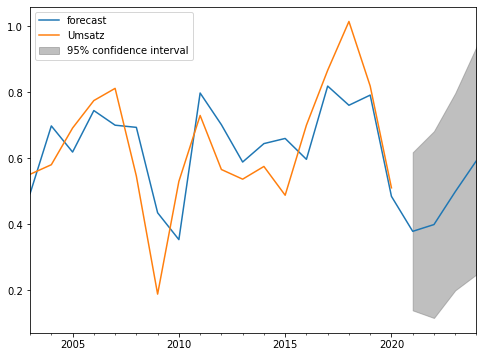

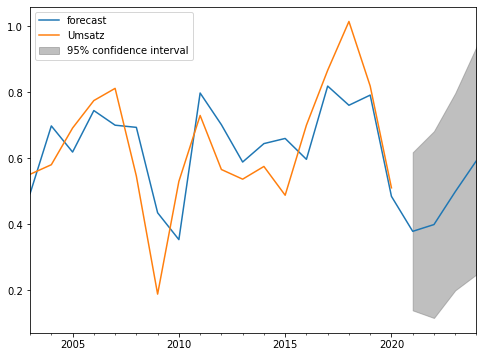

In [24]:
results_ARIMA.plot_predict(1,22)
#results_ARIMA.forecast(steps=2)

In [25]:
forecast = results_ARIMA.forecast(steps=3)[0]
forecast

array([0.37817133, 0.39871069, 0.49831037])

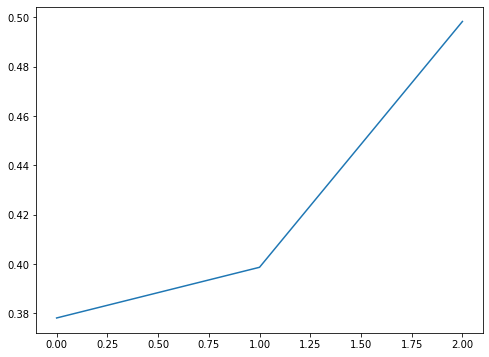

In [26]:
plt.plot(forecast)

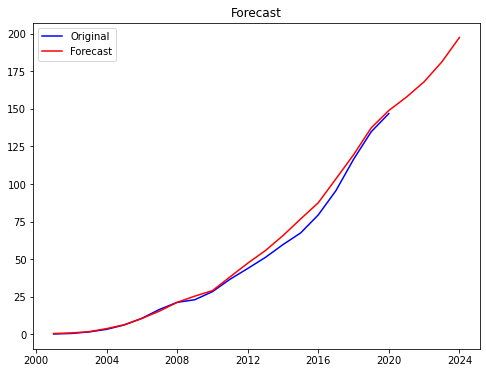

In [27]:
def ConverterDFs(series2, n):
    series = pd.date_range('2021-01-01', periods=n, freq="AS")
    series = pd.DataFrame(series, columns= ["Jahr"])
    predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)
    forecast = results_ARIMA.forecast(steps=n)[0]
    forecast1 = pd.DataFrame(forecast, columns=['Umsatz'])
    df = pd.concat([series, forecast1], axis=1)
    df = df.set_index(df["Jahr"])
    df = df.drop(columns = ["Jahr"])
    my_series = df.squeeze()
    predictions_ARIMA
    total = predictions_ARIMA.add(my_series, fill_value=0)   

    total_cumsum = np.square(total.cumsum())
    total = pd.Series(data_diff["Umsatz"].iloc[0],index=data.index)
    total = total.add(total_cumsum,fill_value=0)

    orig = plt.plot(data, color="blue", label = "Original")
    forecast1 = plt.plot(total, color="red", label = "Forecast")
    plt.legend(loc="best")
    plt.title("Forecast")
    plt.show(block=False)
    

x = ConverterDFs(forecast, 4)

### Finding AIC 

In [424]:
X = data_diff.values
train = X[0:] # 15 data as train data
test = X[16:]  # 5 data as test data
predictions = []


In [425]:
model_arima = ARIMA(train,order=(2, 0, 0))
model_arima_fit = model_arima.fit()



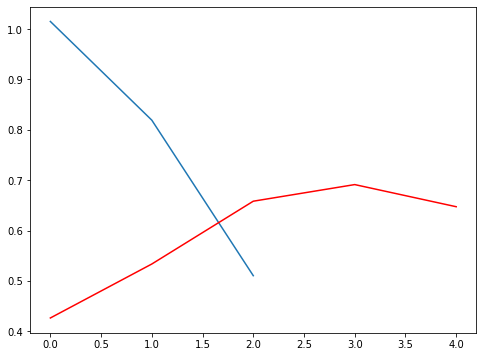

In [426]:
predictions= model_arima_fit.forecast(steps=5)[0]
predictions
plt.plot(test)
plt.plot(predictions,color='red')

In [165]:
#another method
import itertools
p=d=q=range(0,8)
pdq = list(itertools.product(p,d,q))
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue